# Анализ убытков приложения ProcrastinatePRO+

Есть данные о пользователях развлекательного приложения Procrastinate Pro+, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

**Цель исследования:** 

- Разобраться в причинах убытков компании Procrastinate Pro+,
- Сформулировать рекомендации для отдела маркетинга.

**Ход исследования:**

Данные для анализа я получу из файлов:
- визиты: `/datasets/visits_info_short.csv`
- заказы: `/datasets/orders_info_short.csv`
- расходы: `/datasets/costs_info_short.csv`

О качестве данных ничего не известно, поэтому нужно будет сделать обзор данных, при необходимости проведу предобработку данных. Далее загружу функции, которые понядобятся в исследовании, и приступлю к анализу. 

Таким образом исследование будет состоять из 6 этапов:
1) Загрузка данных и подготовка к анализу,
2) Загрузка функций для расчёта и анализа LTV, ROI, удержания и конверсии,
3) Исследовательский анализ данных,
4) Маркетинг,
5) Оценка окупаемости рекламы,
6) Выводы и рекомендации.

В ходе исследования необходимо будет ответить на вопросы:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов,
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

### Загрузка данных и подготовка их к анализу

#### Загрузка данных

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta


In [2]:
try:
    visits = pd.read_csv('visits_info_short.csv')
except:
    visits = pd.read_csv('/datasets/visits_info_short.csv')

In [3]:
try:
    orders = pd.read_csv('/datasets/orders_info_short.csv')
except:
    orders = pd.read_csv('orders_info_short.csv')

In [4]:
try:
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except:
    costs = pd.read_csv('costs_info_short.csv')

#### Предобработка данных

In [5]:
def data_review(data):
    display(data.head(pd.set_option('display.max_columns', None)), data.info(), data.describe())
    
display(data_review(visits))
print()
display(data_review(orders))
print()
display(data_review(costs))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


None

,User Id
count,3.099010e+05
mean,4.997664e+11
std,2.887899e+11
min,5.993260e+05
25%,2.493691e+11
50%,4.989906e+11
75%,7.495211e+11
max,9.999996e+11


None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


None

,User Id,Revenue
count,4.021200e+04,40212.000000
mean,4.990295e+11,5.370608
std,2.860937e+11,3.454208
min,5.993260e+05,4.990000
25%,2.511324e+11,4.990000
50%,4.982840e+11,4.990000
75%,7.433327e+11,4.990000
max,9.998954e+11,49.990000


None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


None

,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


None

Приведем названия столбцов к нижнему регистру и поменяем некоторые названия:

In [6]:
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()


visits.columns = visits.columns.str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
costs.columns = costs.columns.str.lower().str.replace(' ', '_')



print(visits.columns, orders.columns, costs.columns)

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object') Index(['user_id', 'event_dt', 'revenue'], dtype='object') Index(['dt', 'channel', 'costs'], dtype='object')


Проверка данных на наличие пропусков:

In [7]:
print(visits.isna().sum().sort_values())
print()
print(orders.isna().sum().sort_values())
print()
costs.isna().sum().sort_values()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

user_id     0
event_dt    0
revenue     0
dtype: int64



dt         0
channel    0
costs      0
dtype: int64

Проверка на дубликаты:

In [8]:
print(visits.duplicated().sum())
print(orders.duplicated().sum())
print(costs.duplicated().sum())

0
0
0


Изменение типов данных:

In [9]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

Приведем содержимое категориальных столбцов к нижнему регистру:

In [10]:
columns = ['region', 'device', 'channel']
for column in columns:
    visits[column] = visits[column].str.lower()

In [11]:
costs['channel'] = costs['channel'].str.lower()

**Вывод:**

- В исследовании используются данные трех таблиц с информацией о посещениях сайта (6 столбцов, 309 901 строк), информацией о заказах (3 столбца, 40 212 строк) и информацией о затратах на маркетинг (3 столбца, 1 800 строк).
- Анализ проводится по 4 странам: США, Великобритания, Франция и Германия. 
- Категории устройств пользователя: iPhone, Android, PC, Mac.
- Названия столбцов имеют заглавные буквы и пробелы, что неудобно при обработке и анализе данных, поэтому они были заменены на строчные буквы и нижнее подчеркивание. Значения столбцов с датами были преобразованы из строк в datetime64.
- Пропусков и дубликатов в значения в таблицах отсутствуют.

### Загрузка функций для расчёта и анализа LTV, ROI, удержания и конверсии.

Загрузим функции, которые нам пондобятся в ходе анализа. 

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [12]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [13]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [14]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [15]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [16]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [17]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [18]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [19]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [20]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

In [21]:
events = None
profiles = get_profiles(visits, orders, events, costs)


profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,faceboom,mac,united states,2019-05-07,2019-05-07 20:58:57,True,1.088172
1,4919697,2019-07-09 12:46:07,faceboom,iphone,united states,2019-07-09,2019-07-09 12:46:07,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iphone,france,2019-10-01,2019-10-01 09:58:33,False,0.000000
3,22593348,2019-08-22 21:35:48,adnonsense,pc,germany,2019-08-22,2019-08-22 21:35:48,False,0.988235
4,31989216,2019-10-02 00:07:44,yrabbit,iphone,united states,2019-10-02,2019-10-02 00:07:44,False,0.230769


1) Определяем минимальную и максимальную даты привлечения пользователей:

In [22]:
# находим минимальную дату привлечения
min_date = profiles['first_ts'].min()

# находим максимальную дату привлечения
max_date = profiles['first_ts'].max()

In [23]:
print('Минимальная дата привлечения пользователей:', min_date)
print()
print('Максимальная дата привлечения пользователей:', max_date)

Минимальная дата привлечения пользователей: 2019-05-01 00:00:41

Максимальная дата привлечения пользователей: 2019-10-27 23:59:04


- У нас есть данные с 1 мая по 27 октября 2019 года. Первая дата привлечения пользователей 1 мая, а последняя дата привлечения 27 октября. 

- Нашей целью является проанализировать данные с 1 мая по 27 октября, данные соответсвуют ТЗ. 

2) Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [24]:
users_region = profiles.groupby('region').agg({'user_id':'nunique'}).sort_values(by='user_id', ascending = False)
payers_region = profiles.groupby('region').agg({'payer':'mean'}).sort_values(by='payer', ascending = False)

region = users_region.merge(payers_region, on='region')
region['payer'] = round((region['payer'] * 100), 2)
region = region.rename(columns={'user_id':'количество пользователей', 'payer':'доля платящих пользователей(%)'})
display(region)

,количество пользователей,доля платящих пользователей(%)
region,,
united states,100002,6.90
uk,17575,3.98
france,17450,3.80
germany,14981,4.11


- Наши пользователи приходят из четырех стран: из США, Великобритании, Франции и Германии. 
- Половина новых пользователей пришли из США, и, соответсвенно, большая доля платящих пользователей тоже из США. 
- Предварительно можно предположить, что у нас доля платящих пользователей очень маленькая, большая часть пользователей отваливается по пути продуктовой воронки и не совершают покупку.

3) Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [25]:
users_device = profiles.groupby('device').agg({'user_id':'nunique'}).sort_values(by='user_id', ascending = False)
payers_device = profiles.groupby('device').agg({'payer':'mean'}).sort_values(by='payer', ascending = False)

device = users_device.merge(payers_device, on='device')
device['payer'] = round((device['payer'] * 100), 2)
device = device.rename(columns={'user_id':'количество пользователей', 'payer':'доля платящих пользователей(%)'})
display(device)

,количество пользователей,доля платящих пользователей(%)
device,,
iphone,54479,6.21
android,35032,5.85
pc,30455,5.05
mac,30042,6.36


- Больше всего клиенты используют айфоны, меньше всего макбуки. Но в то же время, платящие пользователи больше предпочитают макбуки.

4) Изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [26]:
users_channel = profiles.groupby('channel').agg({'user_id':'nunique'}).sort_values(by='user_id', ascending = False)
payers_channel = profiles.groupby('channel').agg({'payer':'mean'}).sort_values(by='payer', ascending = False)

channel = users_channel.merge(payers_channel, on='channel')
channel['payer'] = round((channel['payer'] * 100), 2)
channel = channel.rename(columns={'user_id':'количество пользователей', 'payer':'доля платящих пользователей(%)'})
display(channel)

,количество пользователей,доля платящих пользователей(%)
channel,,
organic,56439,2.06
faceboom,29144,12.20
tiptop,19561,9.60
opplecreativemedia,8605,2.71
leapbob,8553,3.06
wahoonetbanner,8553,5.30
rocketsuperads,4448,7.91
mediatornado,4364,3.57
yrabbit,4312,3.83


- Больше всего пользователей пришли через органическую выдачу поисковых систем. Это хорошо, так как наша компания привлекает много пользователей бесплатно. Но стоит отметить, что конверсия пользователей, пришедших с этого канала самая маленькая.
- Больше всего платящих пользователей привлекает faceboom. 

**Вывод:**

- По условиям задачи мы смотрим данные 1 ноября 2019 года. В организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей. Таким образом, момент анализа составляет 1 ноября 2019 г., горизонт анализа - 14 дней.

- Минимальная дата привлечения пользователей - 1 мая 2019 г. Максимальная дата с учетом горизонта - 19 октября 2019 г.

- Наши пользователи приходят из четырех стран: из США, Великобритании, Франции и Германии. Половина новых пользователей пришли из США (100002 из 150 008), и они лучше конвертируются, доля платящих пользователей из США около 7%. 

- Клиенты пользуются такими устройствами, как iPhone, Android, Mac и PC. Больше всего клиенты используют айфоны, меньше всего макбуки. А самая лучшая конвертация у пользователей Mac, следом идут пользователи IPhone. Мы можем сказать, что в целом пользователи Apple имеют лучшую конверсию в покупателей. Возможно, тут есть плюсы ApplePay.

- Больше всего пользователей пришли через органическую выдачу поисковых систем. Это хорошо, так как наша компания привлекает много пользователей бесплатно. Но стоит отметить, что доля платящих пользователей, пришедших с этого канала самая маленькая (2%).Больше всего платящих пользователей привлекает faceboom (12%). 

### Маркетинг

1) Общая сумма расходов на маркетинг.

In [27]:
print('Общая сумма расходов на маркетинг', round(costs['costs'].sum(), 2))

Общая сумма расходов на маркетинг 105497.3


2) Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

Из таблицы profiles удалим источник organic, так как пользователи из этого канала приходят бесплатно. 

In [28]:
profiles = profiles.query('channel != "organic"')

In [29]:
costs_assignment = costs.pivot_table(index='channel', values='costs', aggfunc='sum').sort_values(
    by = 'costs', ascending=False)
costs_assignment = costs_assignment.rename(columns={'channel':'каналы привлечения', 'costs':'потрачено на рекламу'})

display(costs_assignment)

,потрачено на рекламу
channel,
tiptop,54751.30
faceboom,32445.60
wahoonetbanner,5151.00
adnonsense,3911.25
opplecreativemedia,2151.25
rocketsuperads,1833.00
leapbob,1797.60
lambdamediaads,1557.60
mediatornado,954.48


3) Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.

In [30]:
costs['costs_week'] = costs['dt'].astype('datetime64[W]').dt.date
costs_by_week = costs.pivot_table(index='costs_week', columns='channel', values='costs', aggfunc='sum')

In [31]:
costs['costs_month'] = costs['dt'].astype('datetime64[M]').dt.date
costs_by_month = costs.pivot_table(index='costs_month', columns='channel', values='costs', aggfunc='sum')

In [32]:
costs['costs_week'] = pd.to_datetime(costs['costs_week'])
costs['costs_month'] = pd.to_datetime(costs['costs_week'])

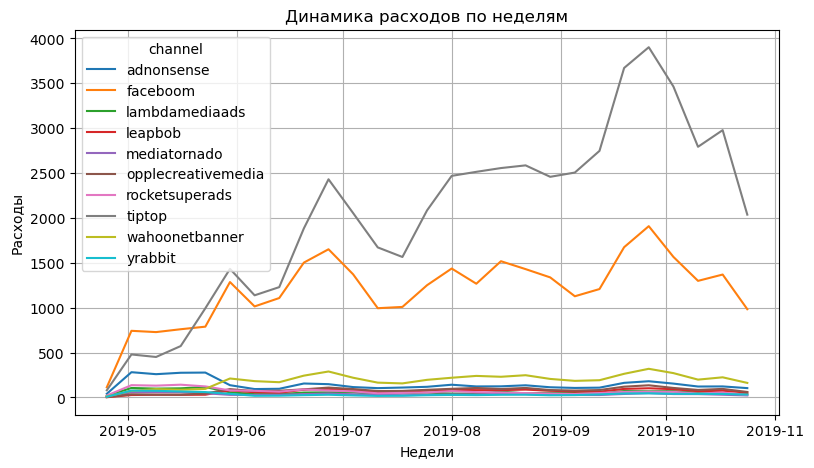

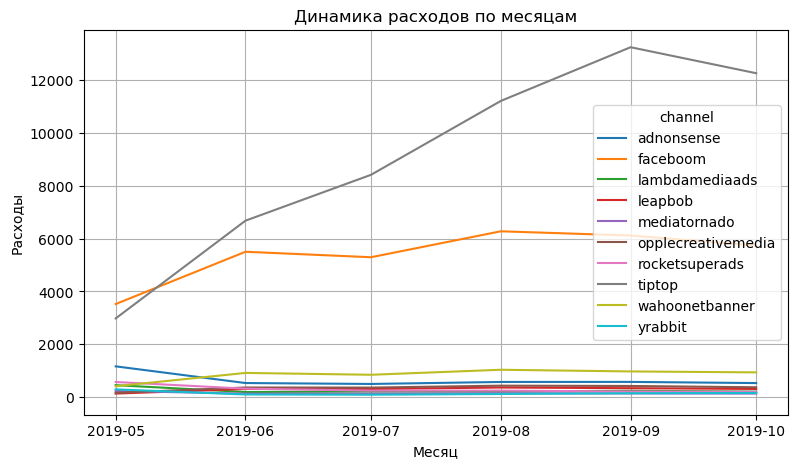

In [33]:
plt.figure(figsize = (20, 5))

ax1=plt.subplot(1, 2, 2)

costs_by_week.plot(grid=True, ax=ax1) 
plt.title('Динамика расходов по неделям')
plt.ylabel('Расходы')
plt.xlabel('Недели')
plt.show()


plt.figure(figsize = (20, 5))
ax2=plt.subplot(1, 2, 2, sharey=ax1)

costs_by_month.plot(grid=True, ax=ax2)
plt.title('Динамика расходов по месяцам')
plt.ylabel('Расходы')
plt.xlabel('Месяц')
plt.show()
plt.show()


По графикам распределения расходов по каналам привлечения видно, что компания тратит большие деньги на такие каналы как tiptop и faceboom. Ранее мы выяснили, что эти каналы приносят больше всего клиентов. 

4. Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйзуем профили пользователей.

In [34]:
cac_mean = profiles.pivot_table(index='dt', columns='channel', values = 'acquisition_cost', aggfunc='mean')
display(cac_mean)

channel,adnonsense,faceboom,lambdamediaads,leapbob,mediatornado,opplecreativemedia,rocketsuperads,tiptop,wahoonetbanner,yrabbit
dt,,,,,,,,,,
2019-05-01,1.050000,1.089423,0.765217,0.210000,0.240000,0.236111,0.540000,0.975610,0.568421,0.289286
2019-05-02,0.962500,1.084722,0.730435,0.183750,0.229091,0.265625,0.565500,1.000000,0.514286,0.253846
2019-05-03,1.050000,1.128947,0.730435,0.210000,0.232000,0.239583,0.528387,1.049180,0.600000,0.310345
2019-05-04,1.008824,1.108943,0.733333,0.199500,0.212727,0.250000,0.531818,0.972222,0.540000,0.294340
2019-05-05,1.020833,1.080531,0.752941,0.200870,0.230000,0.250000,0.561122,1.012987,0.600000,0.290909
...,...,...,...,...,...,...,...,...,...,...
2019-10-23,1.050000,1.120755,0.444444,0.214200,0.229565,0.259804,0.276250,3.462366,0.600000,0.281739
2019-10-24,0.954545,1.111000,0.640000,0.213500,0.219130,0.245098,0.307895,3.411017,0.626866,0.251379
2019-10-25,0.972222,1.104762,0.733333,0.207042,0.215172,0.253846,0.286000,3.525547,0.620000,0.270000


In [35]:
# средний CAC по всему проекту
cac_total = profiles.agg({'acquisition_cost': 'mean'})
round(cac_total, 2)

acquisition_cost    1.13
dtype: float64

Средний cac по всему проекту равен 1,13.

<Figure size 2000x500 with 0 Axes>

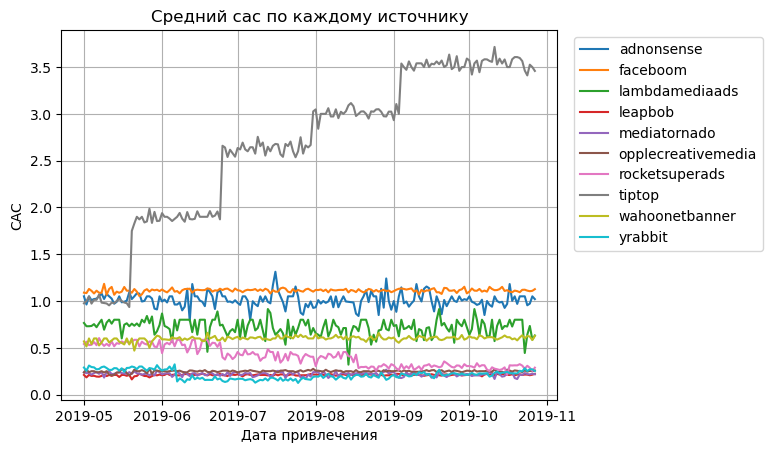

In [36]:
plt.figure(figsize = (20, 5))

cac_mean.plot(grid=True)
plt.ylabel('CAC')
plt.xlabel('Дата привлечения')
plt.title('Средний cac по каждому источнику')
plt.legend(bbox_to_anchor=(1.02, 1.0), loc='best')
plt.show()

Средний cac по всем источникам, кроме tiptop, находятся в районе 0 и 1,2. Средний cac tiptop со временем увеличивется, достигая значения 3,5 в ноябре 2019 года.

**Выводы:**

- Общая сумма расходов на маркетинг составила 105497,3. Больше половины расходов приходится на привлечение пользователей из источника tiptop (54751,3 из 105497,3). Вторым источником по сумме расходов является faceboom (32445,6). Последние места занимают канал YRabbit (944,22) и MediaTornado (954,48)
- В начале мая 2019 года общая стоимость трат на tiptop была ниже, чем на faceboom. Затем с середины мая расходы начали стремительно расти. Пик приходится на конец сентября 2019 года. 
- Средняя стоимость привлечения одного пользователя на tiptop самая высокая, в 2 раза больше, чем на faceboom, стоящего на втором месте в рейтинге средней cac. Средний cac по всем источникам, кроме tiptop, находятся в районе 0 и 1,2. Средний cac tiptop со временем увеличивется, достигая значения 3,5 в ноябре 2019 года, когда как средний cac по всему проекту равен 0,7.
- За отчетный период количество пользователей, привлеченных из tiptop составила 19561, что в примерно 3 раза меньше organic и в 1,5 раза чем faceboom. Конверсия клиентов из tiptop низкая, находится только на 4 месте после faceboom, adnonsense и lambdamediaads.На данном этапе такие большие траты на tiptop кажутся не обоснованными. 


### Оценка окупаемости рекламы

1) Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [37]:
observation_date = datetime(2019, 11, 1).date() # момент анализа
horizon_days = 14  # горизонт анализа

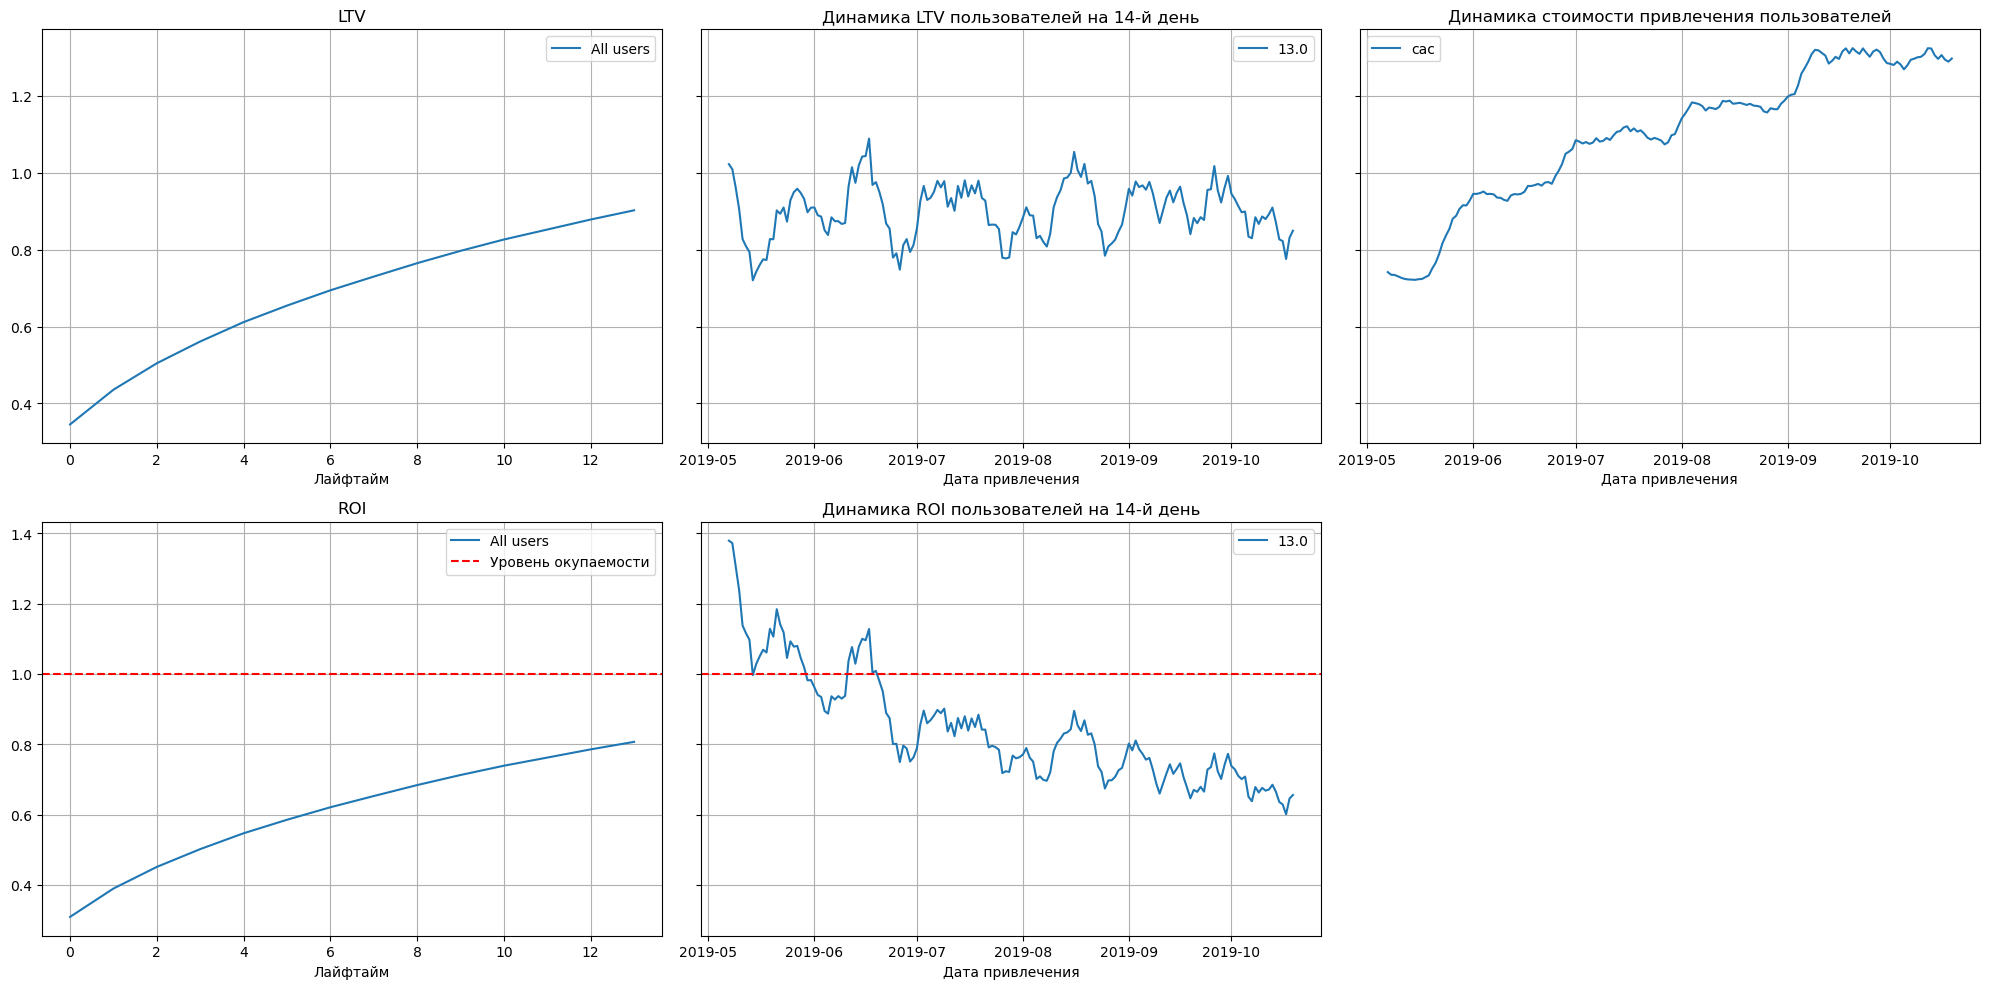

In [38]:
 #считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**Выводы:**

- Реклама не окупается. ROI в конце двух недель достигает примерно 81%. 
- CAC не стабилен, с каждым месяцем стоимость привлечения пользователей увеличивается.
- ROI на 14-й день имеет отрицательную динамику. Начиная с июля 2019 года инвестиции на рекламу на 14-й день жизни клиента не окупаются. 

2) Проверим конверсию пользователей и динамику её изменения.

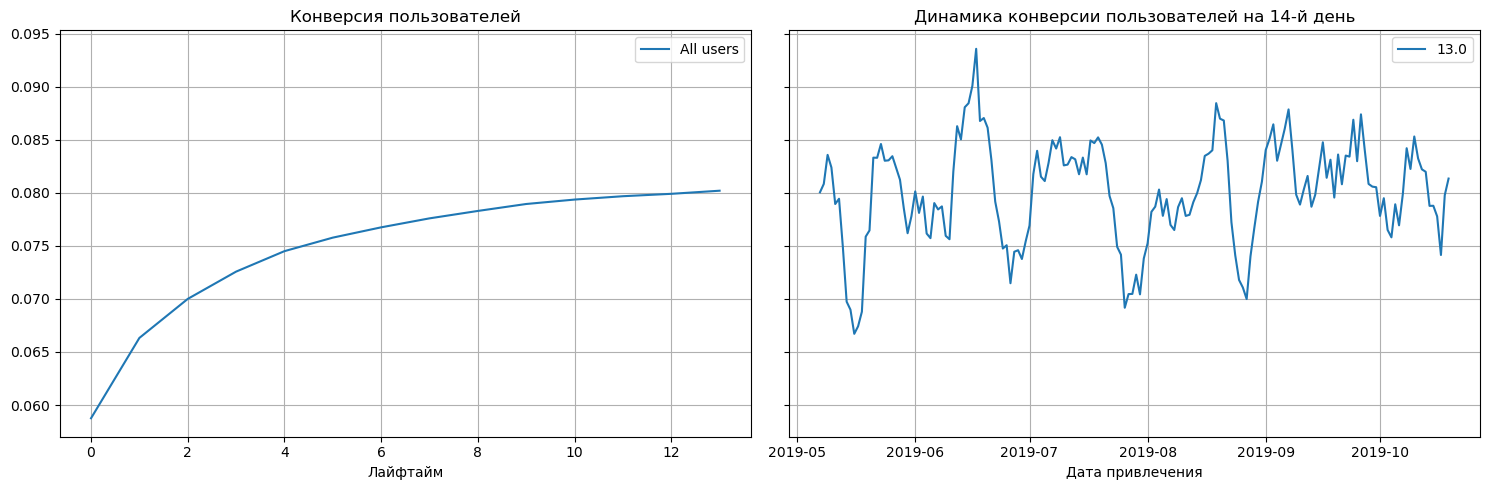

In [39]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Общая конверсия растёт со временем: от 4% в первый день «жизни» пользователей до 8 % на четырнадцатый день. Наблюдается очень хорошая конверсия в середине июня 2019. 

3) Проверим удержание пользователей и динамику её изменения.

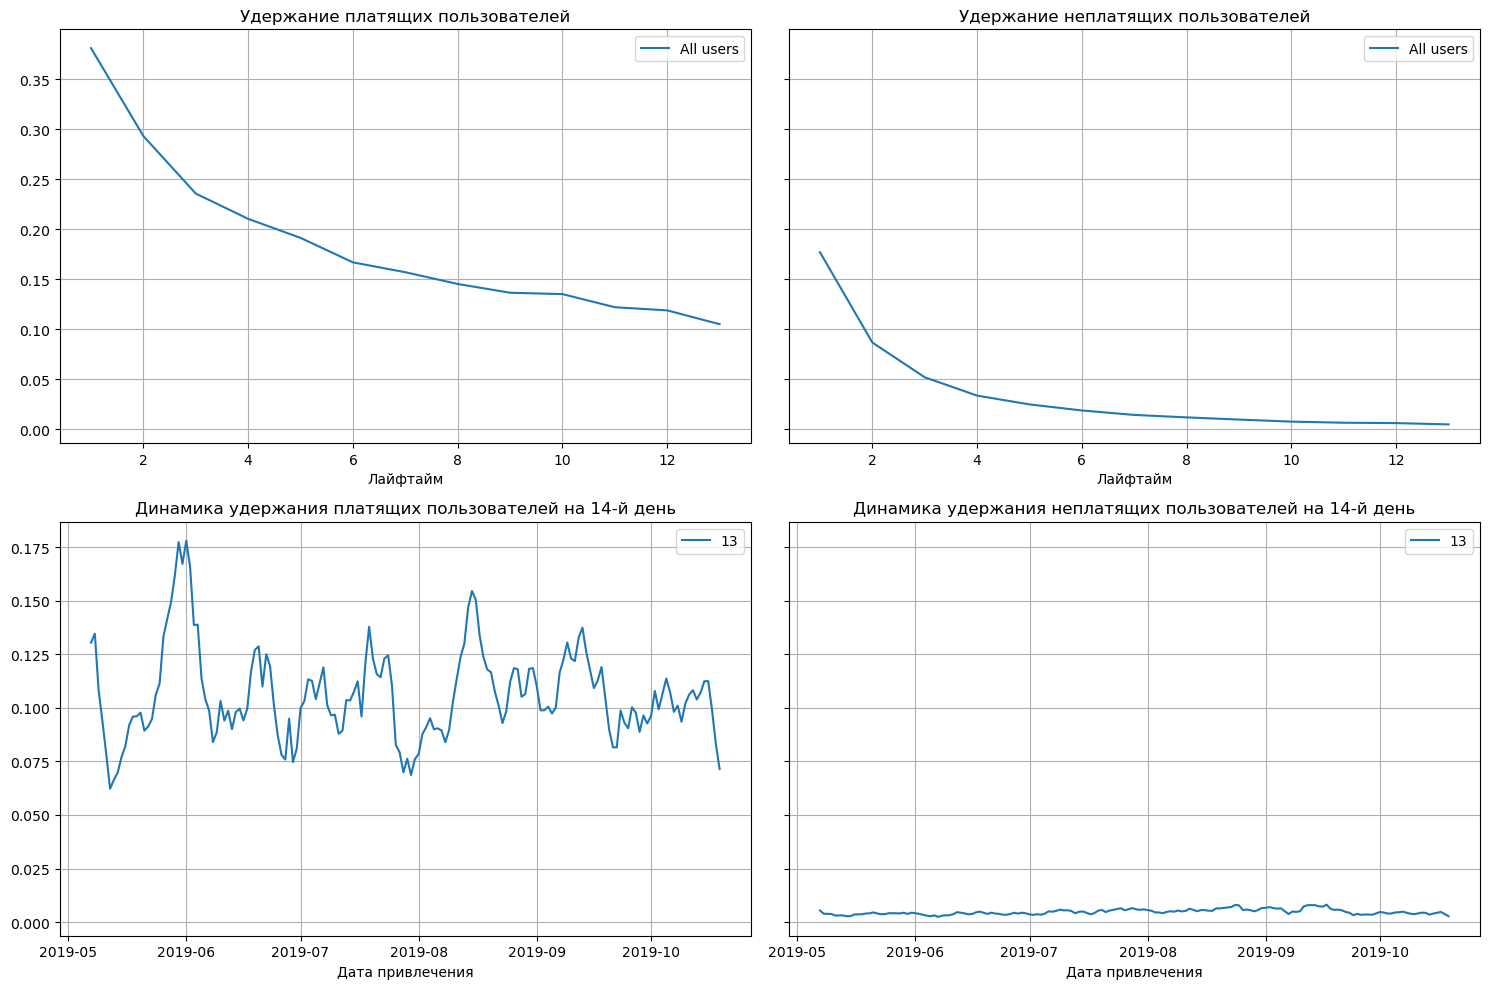

In [40]:
retention_raw, retention_grouped, retention_history = get_retention(
   profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days, window=7)

- Платящие клиенты удерживаются лучше неплатящих. На второй день жизни около 40% платящих клиентов возвращаются. На 14 день жизни мы удерживаем примерно 12% платящих пользователей. 
- В конце мая и в начале июня 2019 года компания удержала больше всего клиентов. 
- Удержание неплатящих пользователей с 3 дня жизни стремится к нулю. Динамика удержания неплатящих пользователей почти не меняется. 

4) Проанализируем окупаемость рекламы с разбивкой по устройствам.

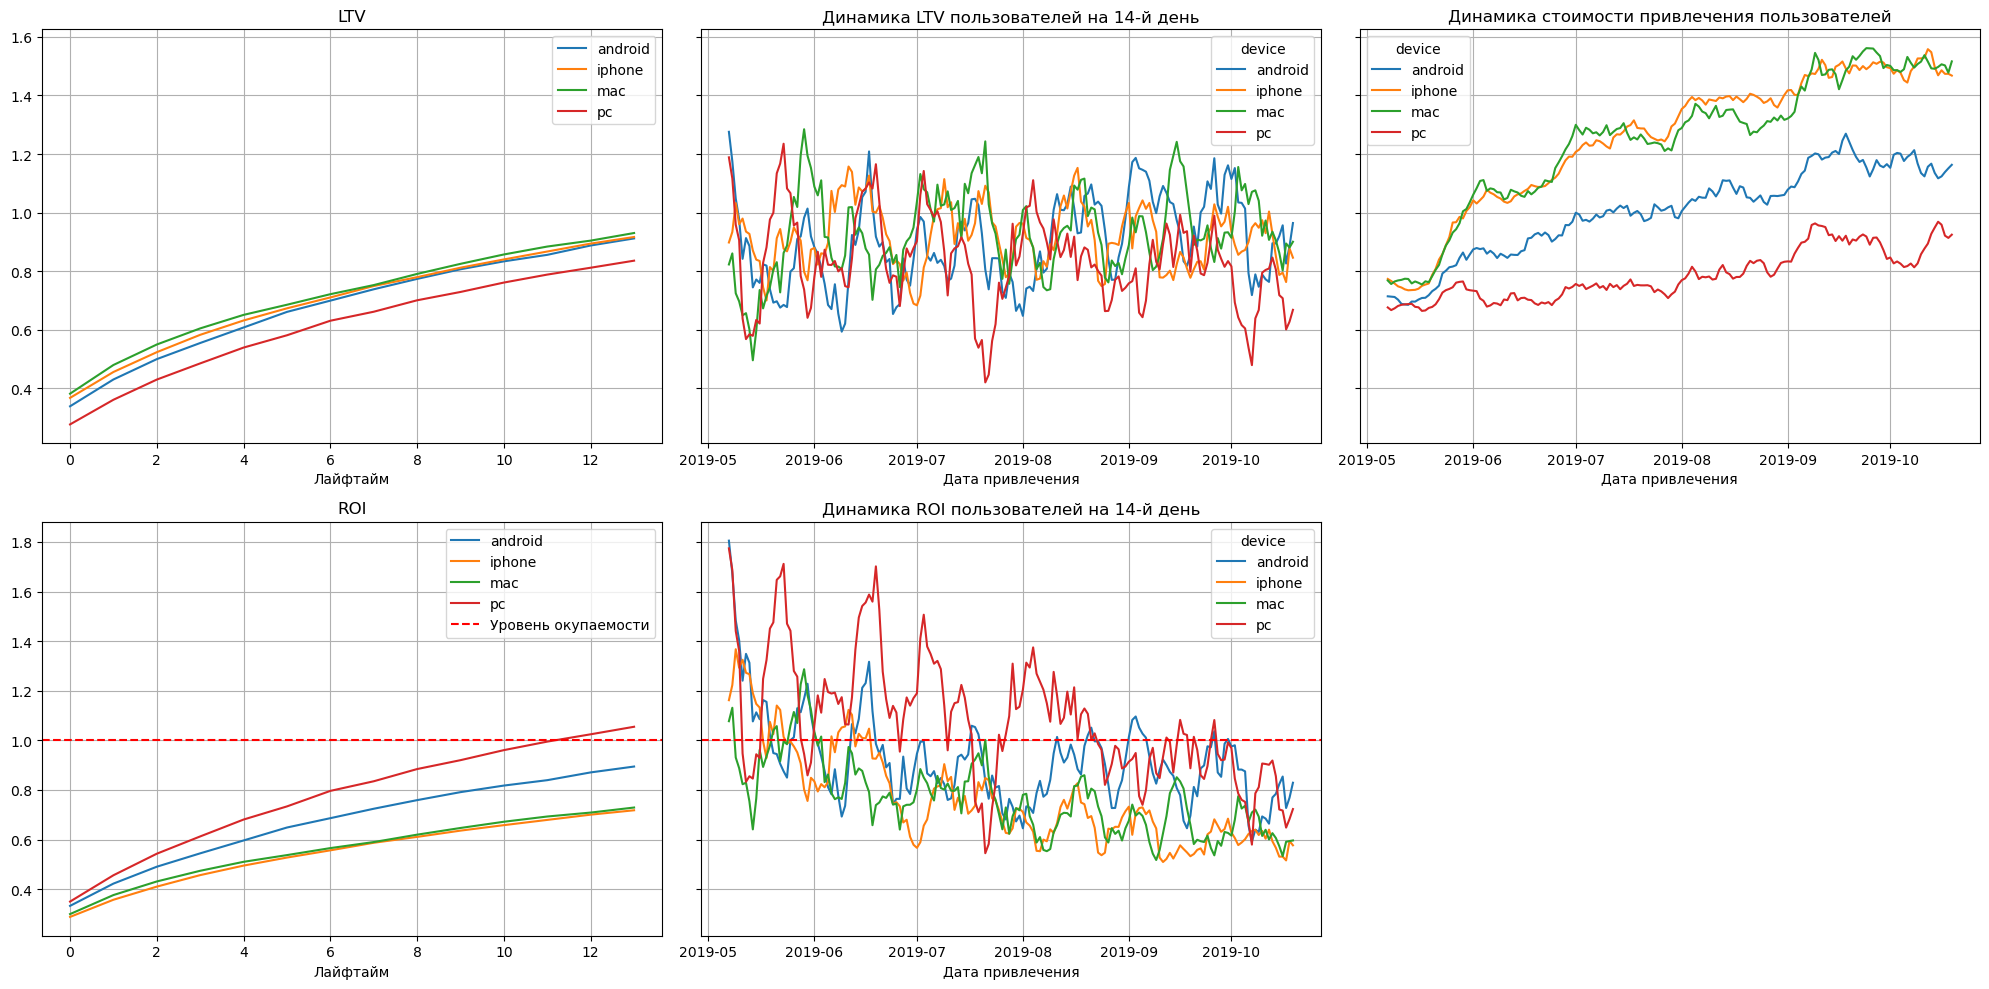

In [41]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days
)

- Только пользователи pc окупаются в течение 14 дней жизни. А вот iphone и mac стабильно не окупаются с июня 2019 года.
- Ранее мы заметили, что доля платящих пользователей pc (0,05)  ниже, чем пользователей mac (0,063), iphone (0,062) и android (0,058). Не смотря на это, последние не окупаются.
- cac пользователей mac и iphone намного выше, чем android и pc.
- LTV пользователей mac выше остальных, но инвестиции не окупаются. А LTV пользователей pc ниже всех, но траты окупаются.

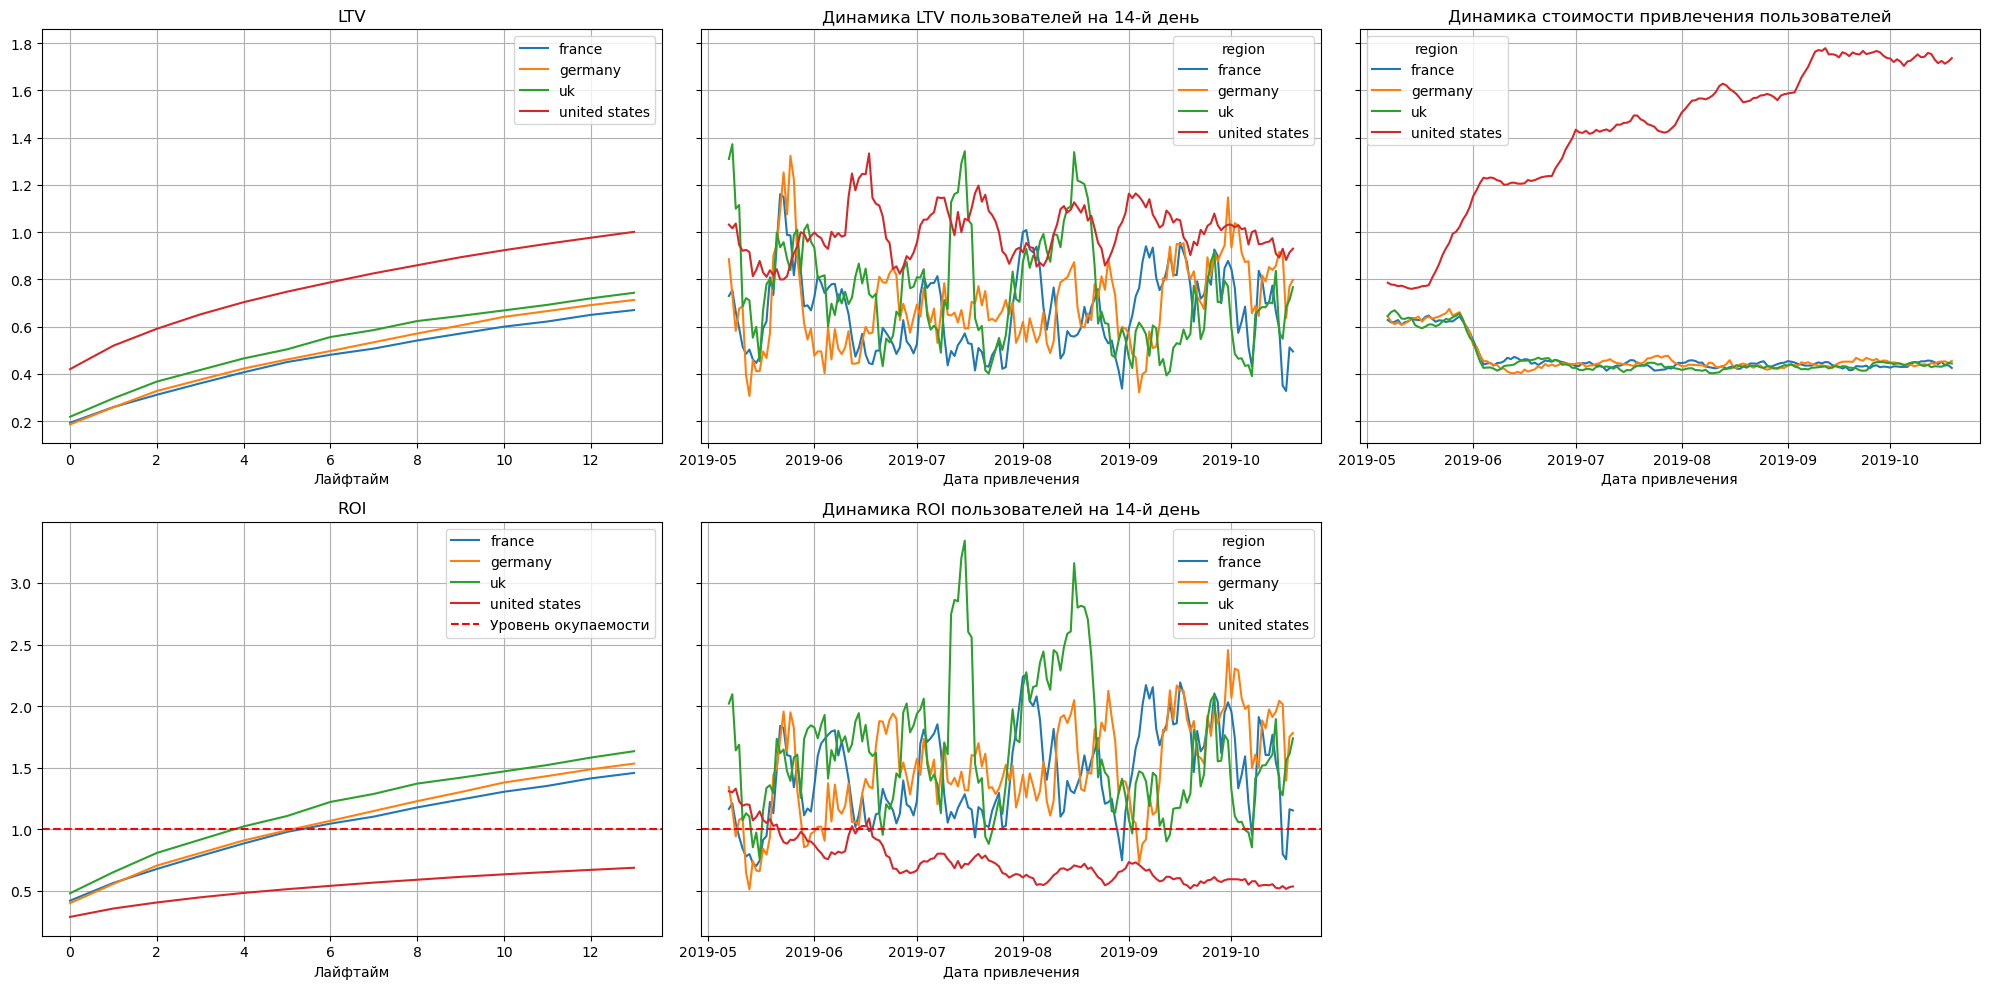

In [42]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days
)

- Ранее мы выяснили, что больше половины наших пользователей пришли из США и LTV пользователей из этой страны больше всего. Но мы видим, что потраченные деньги на привлечение клиентов из США не окупатся. 
- В середине мая cac пользователей из США резко увеличилось, и с тех пор инвестиции не окупаются. 

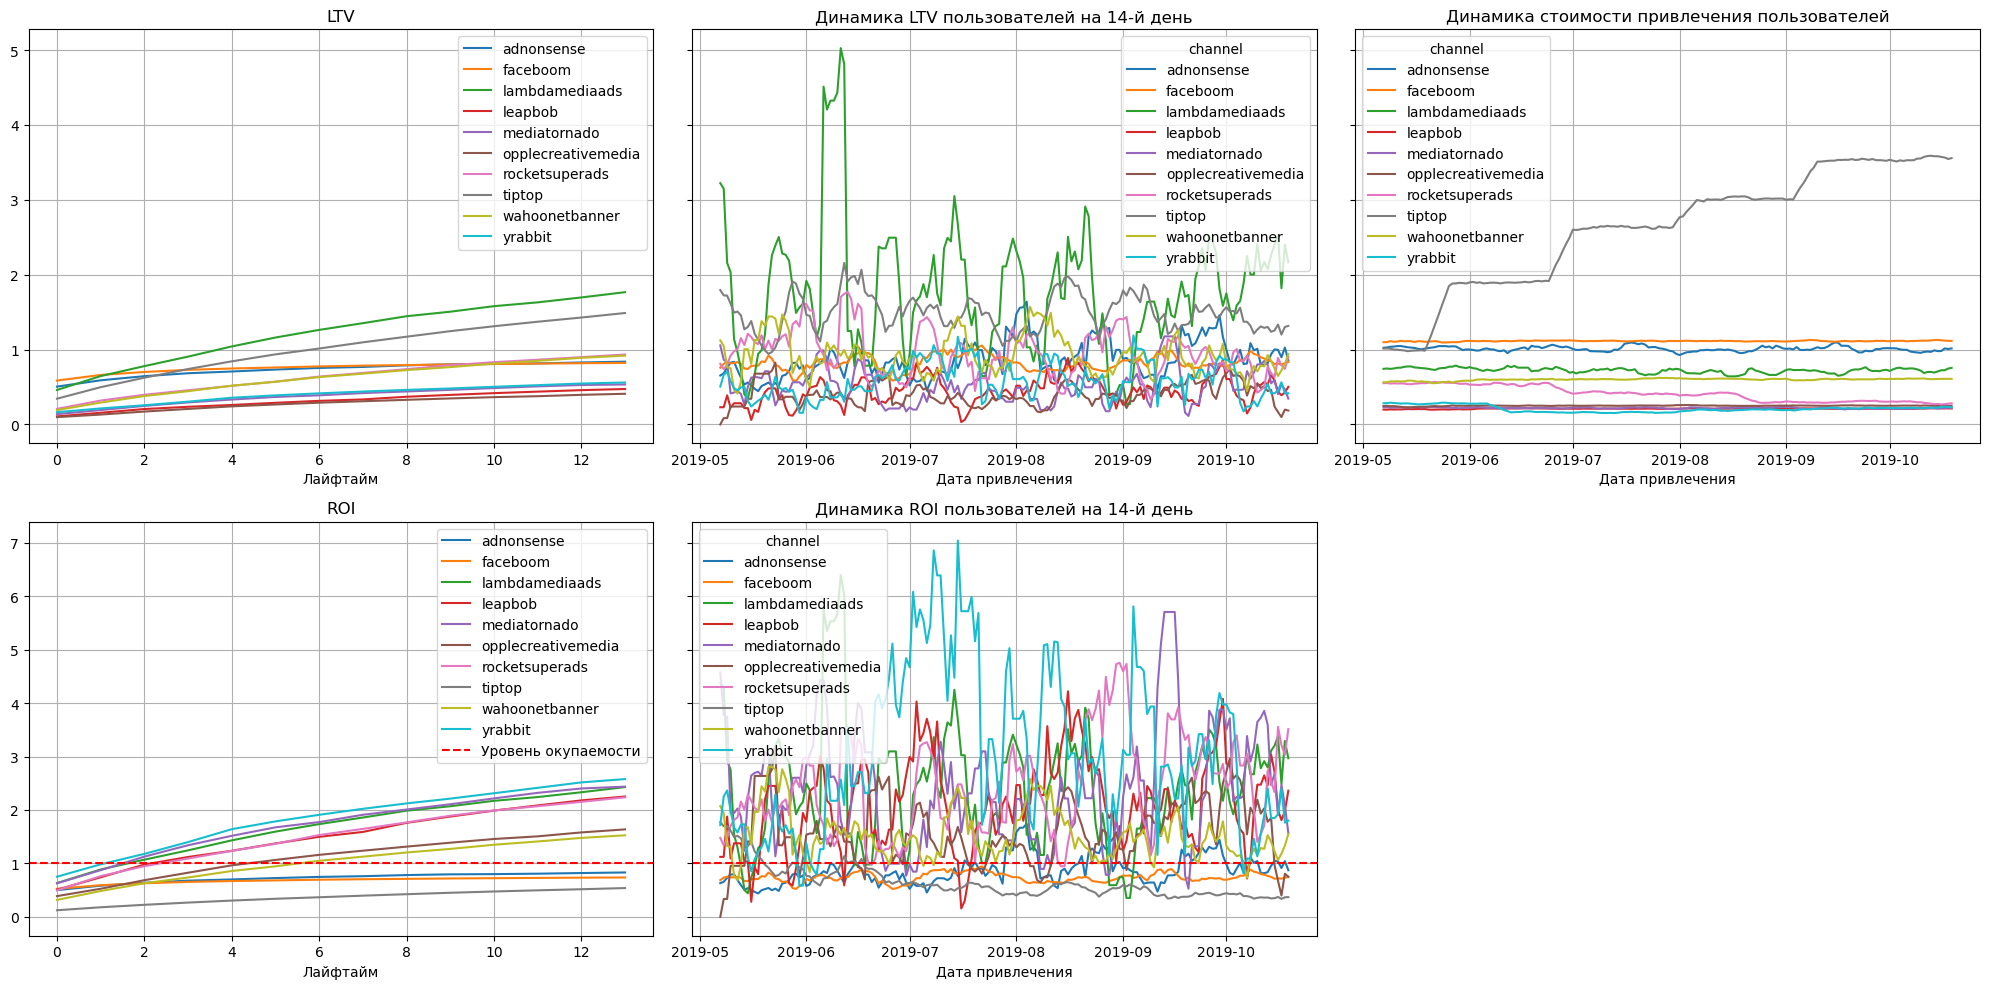

In [43]:
# смотрим окупаемость с разбивкой по каналам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days
)

**Выводы:**

- Инвестиции, потраченные на привлечение пользователей из abdonsense, faceboom и tiptop не окупаются. 
- CAC всех источников, кроме tiptop относительно стабильны. CAC tiptop стремительно повышается. 
- Больше всего пользователей компания привлекла из источников faceboom(29 144 клиентов, доля платящих клиентов 12,2) и tiptop (19 561 клиентов, доля платящих 9,6). Но эти каналы привлечения окупаются хуже всего. 
- LTV пользователей из канала lambdamediaads выше остальных, но количество пользователей самое маленькое(только 21490), хотя доля платящих клиентов (10,47) находится на третем месте после faceboom и abdonsense.  

Если смотреть на окупаемость с разбивкой по устройствам, странам и каналам привлечени, наблюдается одинаковая тенденция: если какой-либо источник, страна или девайс приносит больше всего клиентов, стоимость привлечения 1 клиента стремительно повышается. Количество не значит качество, нужно посмотреть на конверсию:

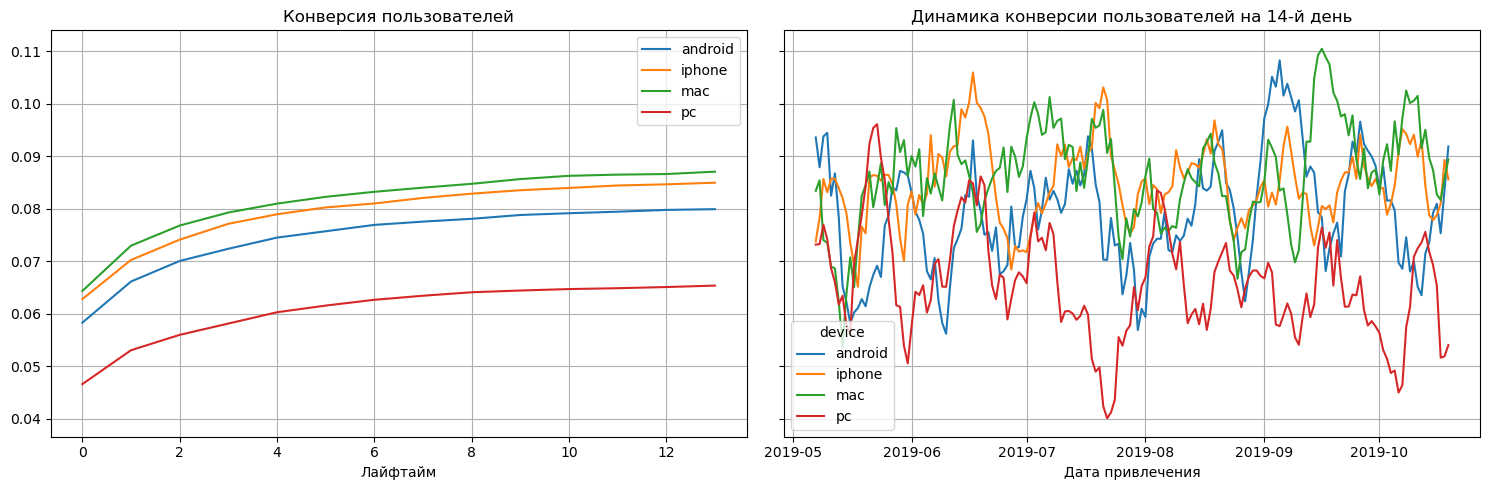

In [44]:
# смотрим конверсию с разбивкой по устройствам
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия пользователей mac и iphone выше остальных. Значит, дело не в конверсии. Проверим удержание:

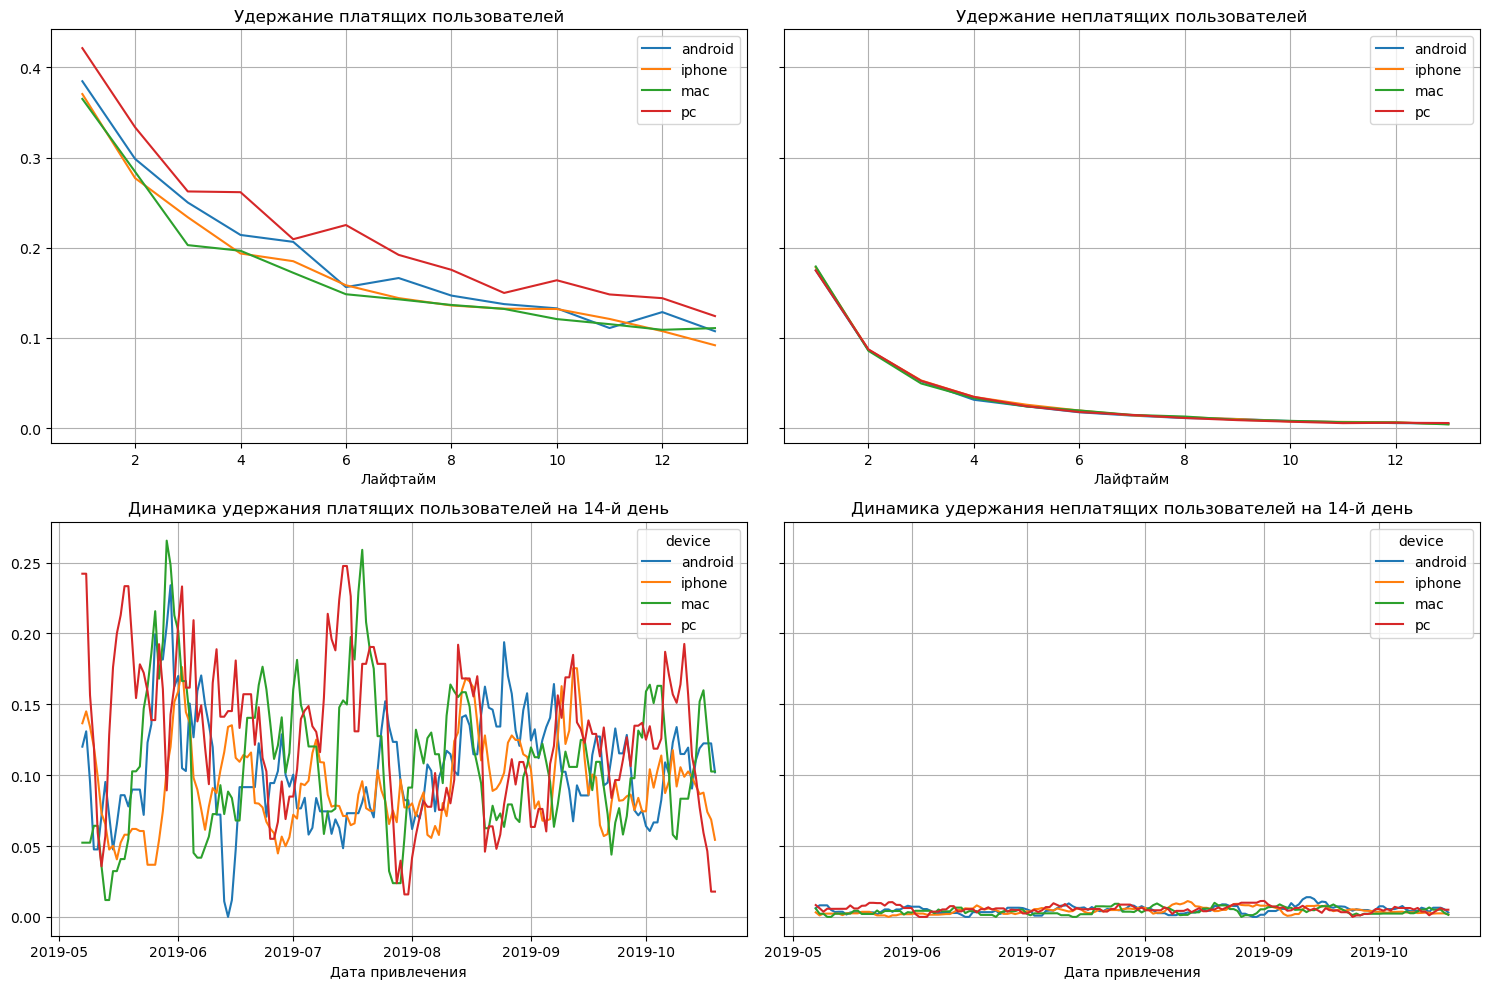

In [45]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Действительно, пользователи iPhone и MAC удерживаются хуже остальных, но отстают не сильно. Возможно есть некоторые технические проблемы. 

Посмотрим на конверсию и удержание с разбивкой по странам и источникам привлечения:

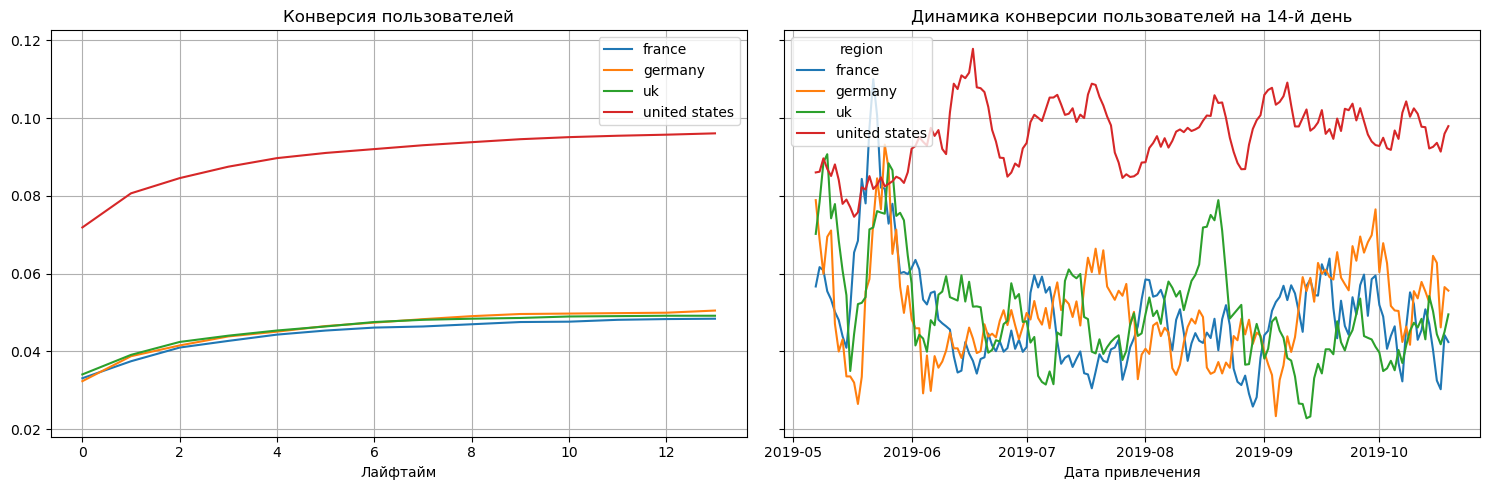

In [46]:
# смотрим конверсию с разбивкой по странам
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия пользователей из США самая высокая. Конверся клиентов из других стран находтся примерно на одном уровне.

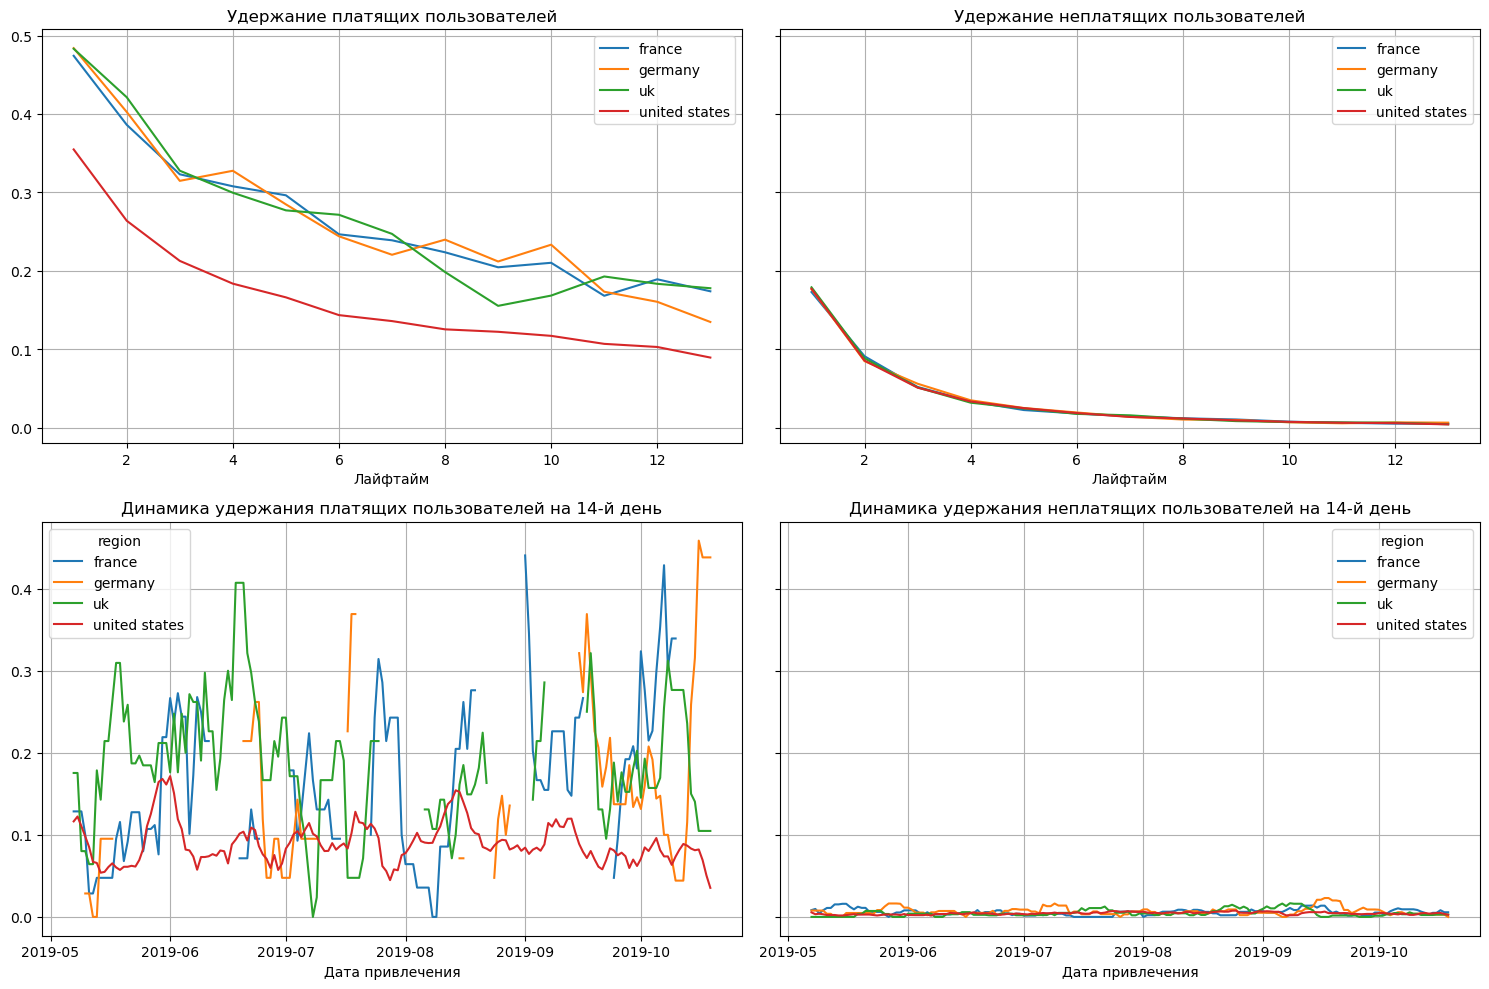

In [47]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

По графику видно, что пользователи из США очень плохо удерживаются. 

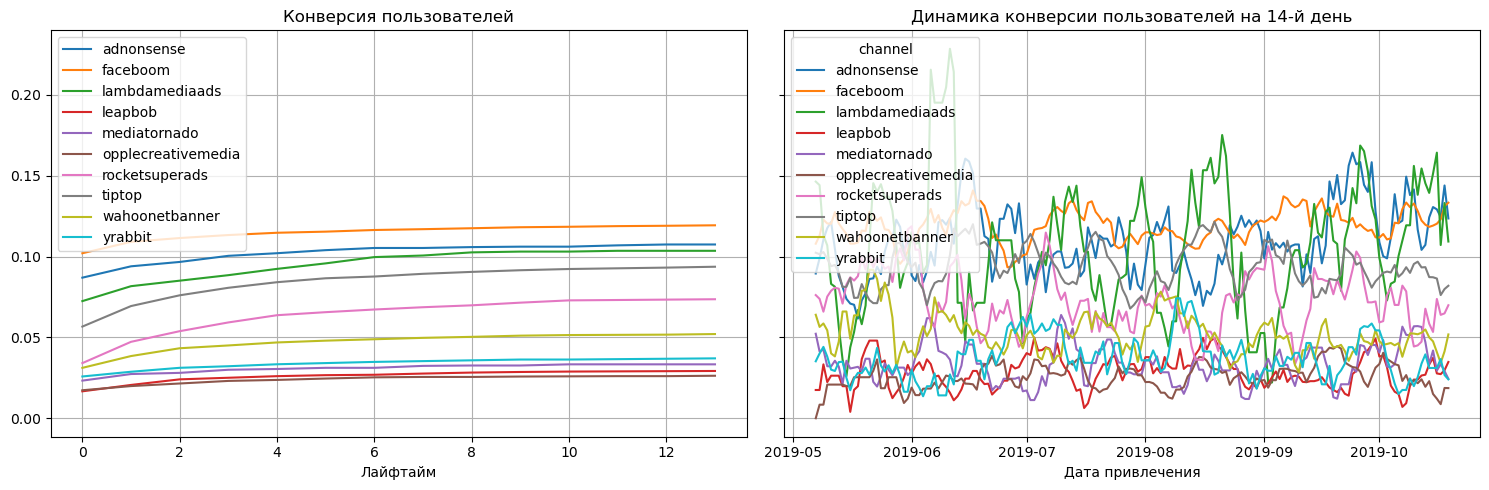

In [48]:
# смотрим конверсию с разбивкой по каналам привлечения
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Пользователи, привлеченные из faceboom конвертируются лучше всех. Самый низкий уровень конверсии оказалось у opplecreativmedia.

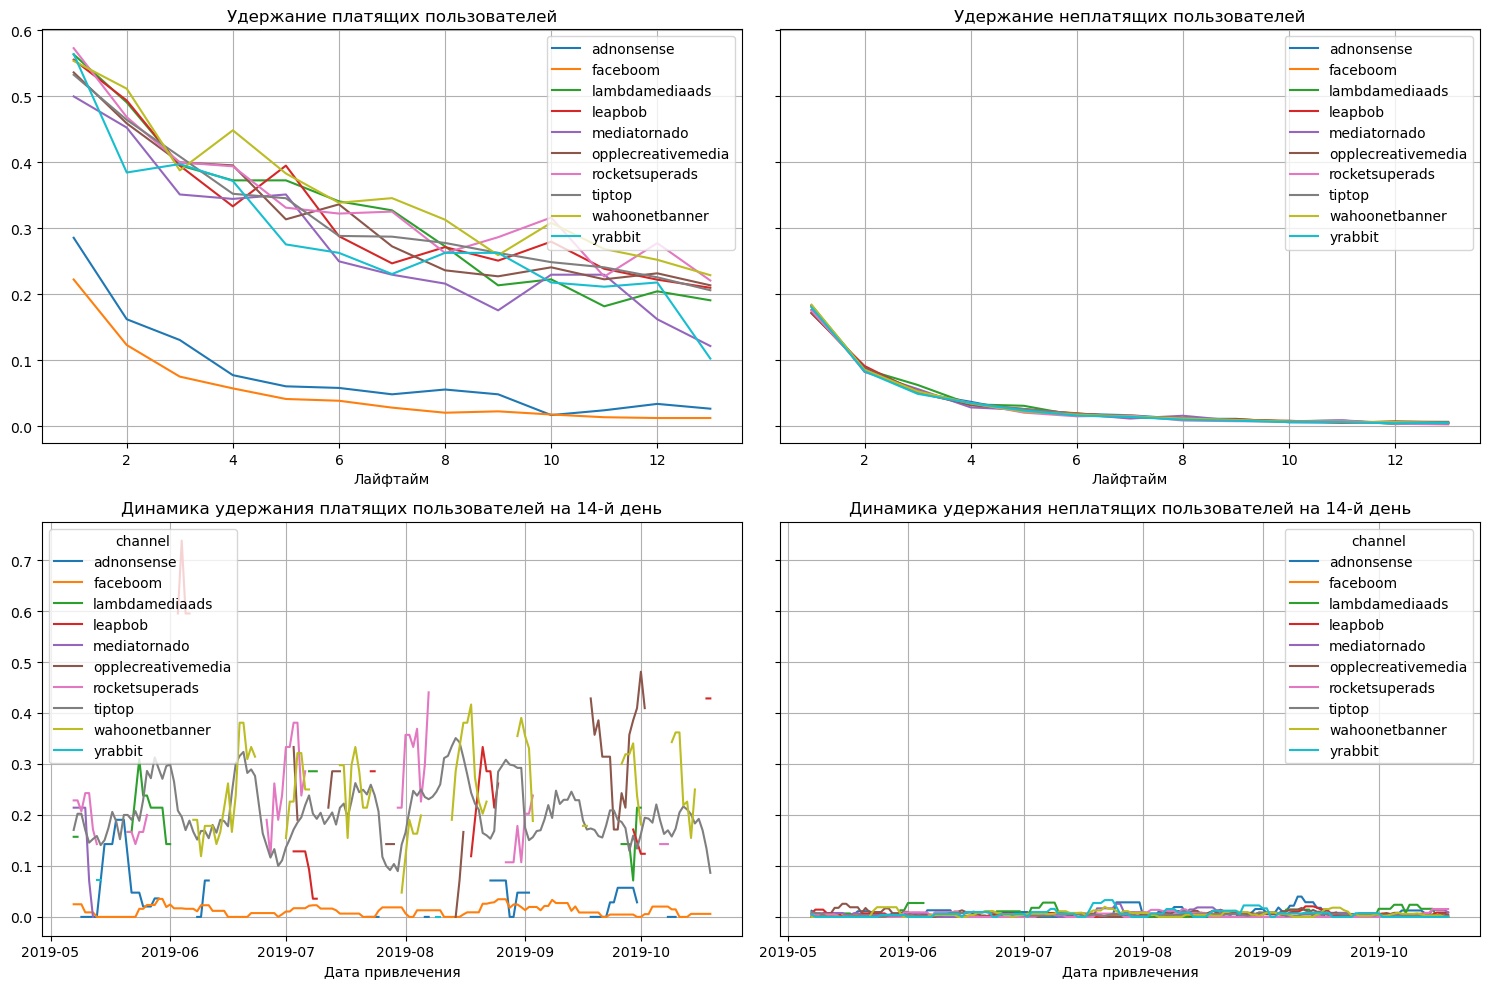

In [49]:
# смотрим удержание с разбивкой по по каналам привлечения

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Пользователи из faceboom и abdonsense удерживаются хуже всех. 

Cейчас мы видим, что проблема компании заключается в неспособности удержать пользователей. 

Мы привлекаем большое количество пользователей, например, из США, путем рекламы на faceboom, соответсвенно тратим больше денег. Эти клиенты хорошо конвертируются, но быстро отваливаются, не дожив 14 дней. Так затраты на привлечение этих клиентов не окупаются. 

**Ответы на вопросы:**
1) Окупается ли реклама, направленная на привлечение пользователей в целом?

Инвестиции, потраченные компанией на привлечение пользователей не окупаются.

2) Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?

Лидеры по количеству пользователей оказывают негативное влияние на окупаемость рекламы. Лидером по устройстам является iphone, по стране США и по рекламным каналам faceboom. Клиенты с такими характеристиками хорошо конвертируются, имеют высокий LTV, но плохо удерживаюся, не доживают до 14 дней, соответсвенно траты на них не окупаются. 

3) Чем могут быть вызваны проблемы окупаемости?

Проблема окупаемости вызваны плохим удержанием клиентов. 

### Общий вывод

- На первый взгляд кажется, что компания хорошо привлекает клиентов, относительно хорошо конвертирует в покупатели (конверсия на 14-й день достигает 8%). Но инвестиции на привлечение клиентов не окупаются, и компания терпит убытки. 
- В ходе исследования заметили, что самые популярные характеристики клиентов, такие как пользователь iphone, страна США, канал привлечения faceboom, окупаются хуже всего. Дело оказалось не в конверсии, а в удержании клиентов. Компания привлекает много клиентов, тратит огромные деньги на это, хорошо конвертирует в покупатели, но они быстро откалываются, не дожив 14 дней. 

Рекомендации для отдела маркетинга:
- Проверить, есть ли какие-либо проблемы в интерфейсе. Удержание пользователей iphone и mac хуже всего. Стоит начать проверку с устройств Apple, так как большая часть клиентов пользуются iphone, а пользователи mac лидируют по LTV. Не удерживая этот сегмент мы теряем деньги. 
- Большая часть клиентов компании пришли из США. Они хорошо конвертируются в покупатели, но плохо удерживаются. Стоит проверить, хорошо ли работает служба поддержки клиентов. Возможно, есть какие-либо проблемы и неудобства в использовании нашего продукта. Нужно постараться больше общаться с клиентами и получать обратную связь. Например, можно предложить пройти небольшой опрос, когда клиент отменяют подписку. 
- Можно ввести бонусную или скидочную систему для повторных покупателей. 
- Рекламные источники, такие как faceboom и tiptop приносят больше всего клиентов. Стоимость привлечния клиента (cac) из tiptop стремительно растет с середины мая 2019 года, когда как cac у других источников практически не меняется. Больше половины рекламного бюджета потратили на tiptop (54751,3 из 105497,3). К тоже, же у этого источника не высокая конверсия, находится в районе 7%. Это можно объяснить тем, что аудитория у tiptop молодая, они менее платежеспособны. Но отказываться от этого канала не стоит, так как привлеченные молодые люди со временем могут превратиться в платящих клиентов.Нужно пересмотреть систему оплаты за рекламу в tiptop, чтобы сократить расходы. Если мы сейчас платим за клики, стоит перейти на оплату за регистрацию или покупку. 
- Стоит обратить внимание на канал привлечения Yrabbit. У этого канала самая низкая стоимость привлечения одного клиента (средний cac = 0.21, когда как средний cac по всему проекту равен 1.13), инвестиции окупаются быстрее остальных. Но нужно учитывать то, что на данном этапе конверсия у этого канала низкая. Можно временно увеличить количество рекламы в этом канале, в качестве эксперимента, и посмотреть на конверсию пользователей. 